<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<h2 align=center>PRODUCT ANALYSIS</h2>
<img src="producto2.png">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from pandas_profiling import ProfileReport

### Task 2: Univariate & Multivariate Analysis: PRODUCT

In [45]:
df = pd.read_csv('../DataCoSupplyChainDataset.csv',encoding= 'unicode_escape')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_prod = df[['Category Id','Category Name','Product Card Id','Product Category Id','Product Description','Product Image','Product Name','Product Price','Product Status']]

In [5]:
df_prod.head(5)

,Category Id,Category Name,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status
0,73,Sporting Goods,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
1,73,Sporting Goods,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
2,73,Sporting Goods,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
3,73,Sporting Goods,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
4,73,Sporting Goods,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0


##### Profile report: 

Over the data frame with only product data (df_prod):

In [6]:
profile = ProfileReport(df_prod)
profile

##### What is the distribution of the variables?

array([[<AxesSubplot:title={'center':'Category Id'}>,
        <AxesSubplot:title={'center':'Product Card Id'}>],
       [<AxesSubplot:title={'center':'Product Category Id'}>,
        <AxesSubplot:title={'center':'Product Description'}>],
       [<AxesSubplot:title={'center':'Product Price'}>,
        <AxesSubplot:title={'center':'Product Status'}>]], dtype=object)

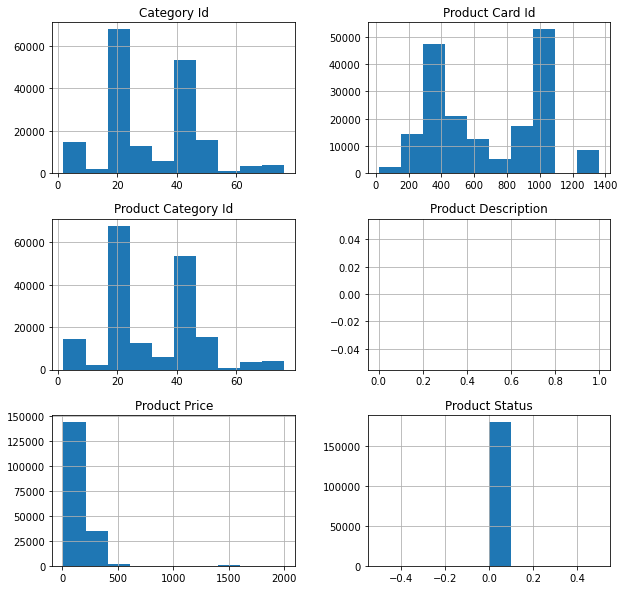

In [8]:
%matplotlib inline
df_prod.hist(figsize=(10,10))

### a)  PRODUCTS

##### How many unique products exist?

In [9]:
df_prod['Product Card Id'].nunique()

118

In [10]:
df_prod['Product Name'].nunique()

118

##### What are the products with more orders (historically)?

In [11]:
df_prod['Product Name'].value_counts().head(10)

Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
Pelican Sunstream 100 Kayak                      15500
Diamondback Women's Serene Classic Comfort Bi    13729
Nike Men's Free 5.0+ Running Shoe                12169
Under Armour Girls' Toddler Spine Surge Runni    10617
Fighting video games                               838
Name: Product Name, dtype: int64

In [12]:
df_prod[['Product Name','Category Name']].value_counts().to_frame(name='Num. orders').head(10)

,,Num. orders
Product Name,Category Name,
Perfect Fitness Perfect Rip Deck,Cleats,24515
Nike Men's CJ Elite 2 TD Football Cleat,Men's Footwear,22246
Nike Men's Dri-FIT Victory Golf Polo,Women's Apparel,21035
O'Brien Men's Neoprene Life Vest,Indoor/Outdoor Games,19298
Field & Stream Sportsman 16 Gun Fire Safe,Fishing,17325
Pelican Sunstream 100 Kayak,Water Sports,15500
Diamondback Women's Serene Classic Comfort Bi,Camping & Hiking,13729
Nike Men's Free 5.0+ Running Shoe,Cardio Equipment,12169
Under Armour Girls' Toddler Spine Surge Runni,Shop By Sport,10617


##### What are the products with less orders (historically)?

In [13]:
df_prod['Product Name'].value_counts().tail(10)

Garmin Forerunner 910XT GPS Watch                35
Titleist Club Glove Travel Cover                 34
GoPro HERO3+ Black Edition Camera                32
Diamondback Boys' Insight 24 Performance Hybr    29
Diamondback Girls' Clarity 24 Hybrid Bike 201    28
Stiga Master Series ST3100 Competition Indoor    27
SOLE E35 Elliptical                              15
Bushnell Pro X7 Jolt Slope Rangefinder           11
SOLE E25 Elliptical                              10
Bowflex SelectTech 1090 Dumbbells                10
Name: Product Name, dtype: int64

##### Which are the products with the highest sells in units?

In [14]:
df_prodcat = df[['Category Name','Product Name','Order Item Quantity']].groupby(['Product Name','Category Name']).sum('Order Item Quantity').sort_values(by='Order Item Quantity',ascending=False).head(10)
df_prodcat

,,Order Item Quantity
Product Name,Category Name,
Perfect Fitness Perfect Rip Deck,Cleats,73698
Nike Men's Dri-FIT Victory Golf Polo,Women's Apparel,62956
O'Brien Men's Neoprene Life Vest,Indoor/Outdoor Games,57803
Nike Men's Free 5.0+ Running Shoe,Cardio Equipment,36680
Under Armour Girls' Toddler Spine Surge Runni,Shop By Sport,31735
Nike Men's CJ Elite 2 TD Football Cleat,Men's Footwear,22246
Field & Stream Sportsman 16 Gun Fire Safe,Fishing,17325
Pelican Sunstream 100 Kayak,Water Sports,15500
Diamondback Women's Serene Classic Comfort Bi,Camping & Hiking,13729


Text(0.5, 1.0, 'Top 10 products with the most units sold')

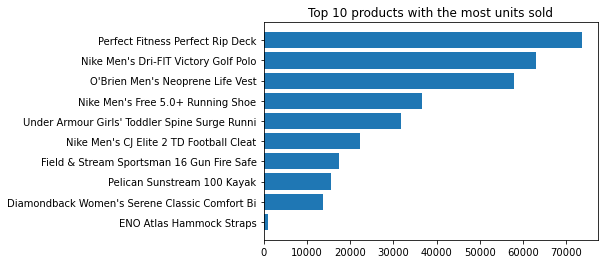

In [15]:
# Pass the index as a column to graph it
df_prodcat.reset_index(inplace=True)
# Change the order to appear on top in the grapf
df_prodcat = df_prodcat.sort_values(by='Order Item Quantity',ascending=True)
# Plot bar graph
plt.barh(y=df_prodcat['Product Name'], width=df_prodcat['Order Item Quantity'])
plt.title('Top 10 products with the most units sold')

##### Which are the products with the highest sells in USD?

In [16]:
df_prodsales = df[['Product Name', 'Sales']].groupby('Product Name').sum('Sales').sort_values(by='Sales',ascending=False).head(10)
df_prodsales

,Sales
Product Name,
Field & Stream Sportsman 16 Gun Fire Safe,6.929654e+06
Perfect Fitness Perfect Rip Deck,4.421143e+06
Diamondback Women's Serene Classic Comfort Bi,4.118426e+06
Nike Men's Free 5.0+ Running Shoe,3.667633e+06
Nike Men's Dri-FIT Victory Golf Polo,3.147800e+06
Pelican Sunstream 100 Kayak,3.099845e+06
Nike Men's CJ Elite 2 TD Football Cleat,2.891758e+06
O'Brien Men's Neoprene Life Vest,2.888994e+06
Under Armour Girls' Toddler Spine Surge Runni,1.269083e+06


Text(0.5, 1.0, 'Top 10 products with the highest sales in Millions of USD')

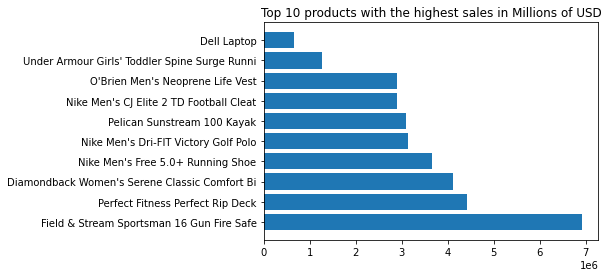

In [17]:
plt.barh(y=df_prodsales.index, width=df_prodsales['Sales'])
plt.title('Top 10 products with the highest sales in Millions of USD')

##### Which are the products that return the highest/lowest profit?

In [18]:
df_salprof = df.groupby('Product Name').sum()[['Sales','Order Item Total','Order Profit Per Order']]
df_salprof.columns = df_salprof.columns.str.replace('Order Item Total','Net money received from sale')
df_salprof.columns = df_salprof.columns.str.replace('Order Profit Per Order','Total Profit per product')
df_salprof = df_salprof.sort_values(by='Total Profit per product', ascending=False)

# Style is saved on a different DF, because it changes the DF object (it becomes a Styler object)
df_salprof_styled = df_salprof.astype('int64').style.format('{:,}')
df_salprof_styled

,Sales,Net money received from sale,Total Profit per product
Product Name,,,
Field & Stream Sportsman 16 Gun Fire Safe,"6,929,653","6,226,935","756,220"
Perfect Fitness Perfect Rip Deck,"4,421,143","3,973,180","493,828"
Diamondback Women's Serene Classic Comfort Bi,"4,118,425","3,700,783","427,455"
Nike Men's Free 5.0+ Running Shoe,"3,667,633","3,295,693","379,915"
Nike Men's Dri-FIT Victory Golf Polo,"3,147,800","2,828,708","350,421"
Pelican Sunstream 100 Kayak,"3,099,845","2,785,518","324,076"
O'Brien Men's Neoprene Life Vest,"2,888,993","2,596,454","318,451"
Nike Men's CJ Elite 2 TD Football Cleat,"2,891,757","2,598,494","311,902"
Under Armour Girls' Toddler Spine Surge Runni,"1,269,082","1,140,770","126,278"


In [19]:
# Index must be a column to the plot
df_salprof = df_salprof.reset_index()

Text(0.5, 1.0, 'Profit of line of products in USD')

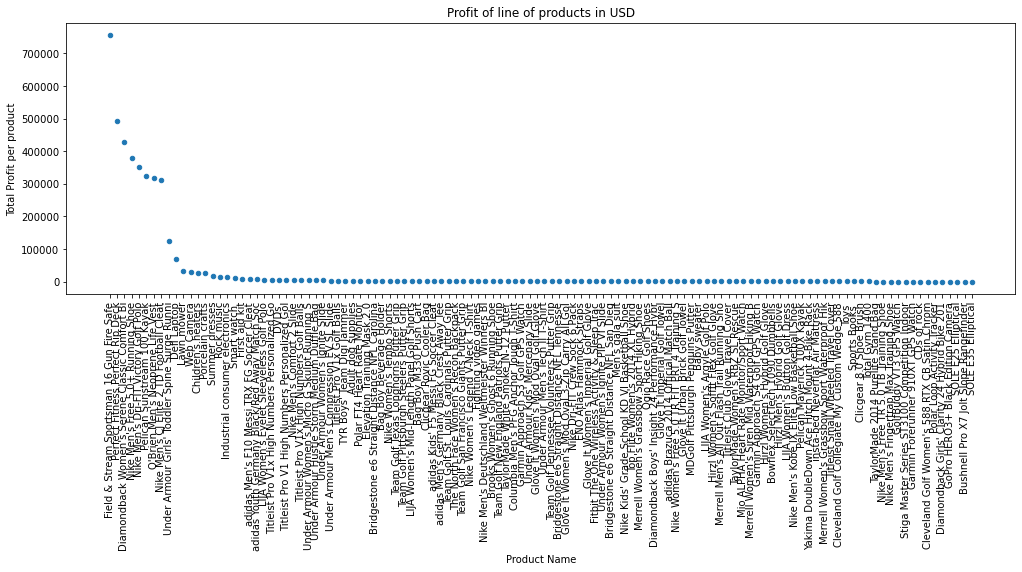

In [20]:
df_salprof.plot(x='Product Name', y="Total Profit per product", kind="scatter",figsize=(17,5))
plt.xticks(rotation=90)
plt.title('Profit of line of products in USD')

In [21]:
df_salprof2 = df.groupby('Product Name').sum()['Order Profit Per Order']
df_salprof2 = df_salprof2[df_salprof2 > 50000]
df_salprof2 = df_salprof2.reset_index()
df_salprof2.columns = df_salprof2.columns.str.replace('Order Profit Per Order','Total Profit per product')
df_salprof2

,Product Name,Total Profit per product
0,Dell Laptop,69656.810171
1,Diamondback Women's Serene Classic Comfort Bi,427455.568106
2,Field & Stream Sportsman 16 Gun Fire Safe,756220.767190
3,Nike Men's CJ Elite 2 TD Football Cleat,311902.820214
4,Nike Men's Dri-FIT Victory Golf Polo,350421.029567
5,Nike Men's Free 5.0+ Running Shoe,379915.818503
6,O'Brien Men's Neoprene Life Vest,318451.430554
7,Pelican Sunstream 100 Kayak,324076.370020
8,Perfect Fitness Perfect Rip Deck,493828.299782
9,Under Armour Girls' Toddler Spine Surge Runni,126278.510299


Text(0.5, 1.0, 'Highest profitable products (> 50.000 USD in profit)')

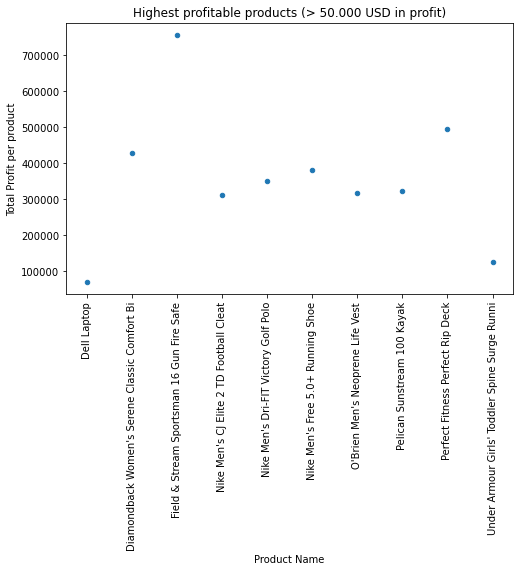

In [22]:
df_salprof2.plot(x="Product Name", y="Total Profit per product", kind="scatter", figsize=(8,5))
plt.xticks(rotation=90)
plt.title('Highest profitable products (> 50.000 USD in profit)')

##### Which products are returning a negative profit?

In [23]:
df_salprof[df_salprof['Total Profit per product'] < 0]

,Product Name,Sales,Net money received from sale,Total Profit per product
115,SOLE E25 Elliptical,9999.899902,9414.899902,-169.559997
116,Bushnell Pro X7 Jolt Slope Rangefinder,6599.889892,6062.889892,-255.950003
117,SOLE E35 Elliptical,29999.849850,26409.849850,-965.119968


### b)  CATEGORIES

##### How many categories exist?

In [24]:
df_prod['Category Name'].nunique()

50

##### Which are the categories with more orders (historically)?

In [25]:
df_categ = df_prod['Category Name'].value_counts().to_frame()
df_categ

,Category Name
Cleats,24551
Men's Footwear,22246
Women's Apparel,21035
Indoor/Outdoor Games,19298
Fishing,17325
Water Sports,15540
Camping & Hiking,13729
Cardio Equipment,12487
Shop By Sport,10984
Electronics,3156


##### Which are sales per categorie and product?

In [26]:
pvt = df.pivot_table(columns=('Category Name','Product Name'),values='Sales')
pvt.head()

Category Name                                Accessories  \
Product Name  Team Golf New England Patriots Putter Grip   
Sales                                          73.191352   

Category Name                                            \
Product Name  Team Golf Pittsburgh Steelers Putter Grip   
Sales                                         75.139423   

Category Name                                             \
Product Name  Team Golf San Francisco Giants Putter Grip   
Sales                                          74.542088   

Category Name                                            \
Product Name  Team Golf St. Louis Cardinals Putter Grip   
Sales                                         76.486964   

Category Name                                             \
Product Name  Team Golf Tennessee Volunteers Putter Grip   
Sales                                          76.219499   

Category Name                                        \
Product Name  Team Golf Texas Longhorns Putter Grip   
Sales                                     74.802842   

Category Name                         As Seen on  TV!        Baby   \
Product Name  Nike Men's Free TR 5.0 TB Training Shoe Baby sweater   
Sales                                      302.910882    59.080002   

Category Name                     Baseball & Softball  \
Product Name  adidas Brazuca 2014 Official Match Ball   
Sales                                      159.990005   

Category Name                                        \
Product Name  adidas Kids' F5 Messi FG Soccer Cleat   
Sales                                    104.302254   

Category Name                                             \
Product Name  adidas Men's F10 Messi TRX FG Soccer Cleat   
Sales                                          184.69053   

Category Name                                    Basketball  \
Product Name  Diamondback Boys' Insight 24 Performance Hybr   
Sales                                             299.98999   

Category Name                                                \
Product Name  Diamondback Girls' Clarity 24 Hybrid Bike 201   
Sales                                             299.98999   

Category Name                            Books   \
Product Name  SOLE E25 Elliptical Sports Books    
Sales                   999.98999         31.08   

Category Name                        Boxing & MMA  \
Product Name  Brooks Women's Ghost 6 Running Shoe   
Sales                                  289.058788   

Category Name                                                \
Product Name  Nike Women's Free 5.0 TR FIT PRT 4 Training S   
Sales                                               279.542   

Category Name                                                      CDs   \
Product Name  Under Armour Women's Micro G Skulpt Running S CDs of rock   
Sales                                             162.22854       11.29   

Category Name    Cameras                               Camping & Hiking  \
Product Name   Web Camera Diamondback Women's Serene Classic Comfort Bi   
Sales          452.040008                                    299.980011   

Category Name                  Cardio Equipment                            \
Product Name  Nike Men's Free 5.0+ Running Shoe Nike Women's Tempo Shorts   
Sales                                301.391503                 85.566038   

Category Name Children's Clothing                           Cleats  \
Product Name   Children's heaters Perfect Fitness Perfect Rip Deck   
Sales                  357.100006                       180.344407   

Category Name                  Computers            Consumer Electronics  \
Product Name  Total Gym 1400 Dell Laptop Industrial consumer electronics   
Sales              299.98999      1500.0                      252.880005   

Category Name           Crafts        DVDs  \
Product Name  Porcelain crafts       DVDs    
Sales               461.480011  164.380005   

Category Name                                   Electronic

<AxesSubplot:xlabel='Category Name', ylabel='Product Name'>

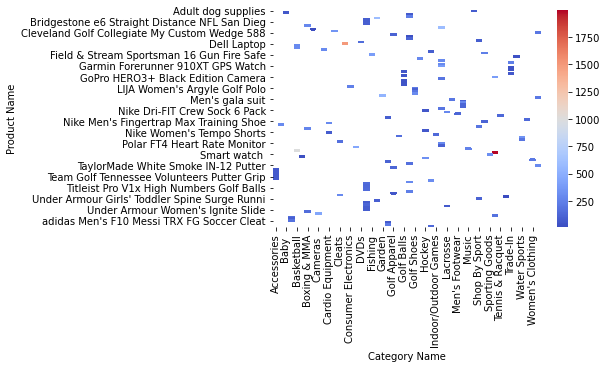

In [27]:
pvt = df.pivot_table(index='Product Name',columns='Category Name',values='Sales')
sns.heatmap(pvt, cmap='coolwarm')

##### How many products does each category have?

In [28]:
df.groupby(['Category Name']).nunique()['Product Name'].sort_values(ascending=False)

Category Name
Electronics             11
Kids' Golf Clubs         8
Golf Gloves              7
Accessories              6
Golf Balls               5
Trade-In                 4
Men's Golf Clubs         4
Girls' Apparel           4
Golf Shoes               4
Baseball & Softball      3
Basketball               3
Boxing & MMA             3
Hockey                   3
Hunting & Shooting       3
Golf Apparel             3
Women's Golf Clubs       3
Strength Training        3
Shop By Sport            3
Lacrosse                 2
Cleats                   2
Cardio Equipment         2
Fitness Accessories      2
Water Sports             2
Soccer                   2
Cameras                  1
Children's Clothing      1
Camping & Hiking         1
Sporting Goods           1
CDs                      1
Consumer Electronics     1
Books                    1
Tennis & Racquet         1
Baby                     1
As Seen on  TV!          1
Computers                1
Men's Footwear           1
Crafts        

##### Which are the categories with the highest sales?

In [29]:
df_catsales = df[['Category Name','Sales']].groupby('Category Name').sum().sort_values(by=['Sales'],ascending=[False]).head(10)
df_catsales_style = df_catsales.astype('int64').style.format('{:,}')
df_catsales_style

,Sales
Category Name,
Fishing,"6,929,653"
Cleats,"4,431,942"
Camping & Hiking,"4,118,425"
Cardio Equipment,"3,694,843"
Women's Apparel,"3,147,800"
Water Sports,"3,113,844"
Men's Footwear,"2,891,757"
Indoor/Outdoor Games,"2,888,993"
Shop By Sport,"1,309,522"


(0.0, 100.0, 0.0, 100.0)

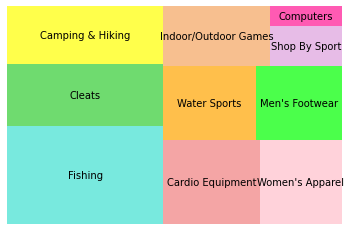

In [30]:
# Index needs to be a column for the plot
df_catsales.reset_index(inplace=True)

squarify.plot(sizes=df_catsales['Sales'], label=df_catsales['Category Name'],color=["turquoise","limegreen","yellow", "lightcoral","pink","orange","lime","sandybrown","plum","deeppink"], alpha=.7 )
plt.axis('off')

##### Pareto Table/Graph. Which are the categories that constitute the 80% of the company's sales?

(Pareto Rule: 20% of the products will constitute the 80% of the sales of the company).

In [31]:
df_catsalespar = df[['Category Name','Sales']].groupby('Category Name').sum().sort_values(by=['Sales'],ascending=[False]).head(15)
df_catsalespar['pareto'] = 100 *df_catsalespar['Sales'].cumsum() /df_catsalespar['Sales'].sum()
df_catsalespar.head(10)

,Sales,pareto
Category Name,,
Fishing,6.929654e+06,20.061309
Cleats,4.431943e+06,32.891759
Camping & Hiking,4.118426e+06,44.814578
Cardio Equipment,3.694843e+06,55.511129
Women's Apparel,3.147800e+06,64.623993
Water Sports,3.113845e+06,73.638556
Men's Footwear,2.891758e+06,82.010178
Indoor/Outdoor Games,2.888994e+06,90.373800
Shop By Sport,1.309522e+06,94.164859


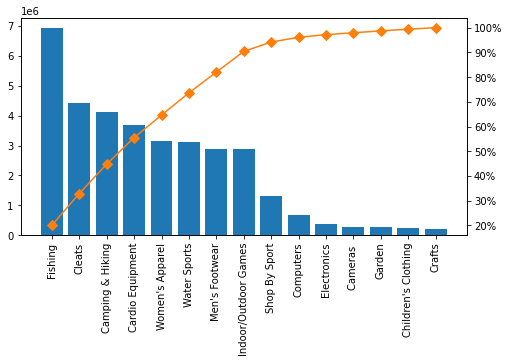

In [32]:
from matplotlib.ticker import PercentFormatter
fig, axes = plt.subplots(figsize=(8, 4))
axes.bar(df_catsalespar.index,df_catsalespar['Sales'],color='C0')
plt.xticks(rotation=90)
ax2=axes.twinx()
ax2.plot(df_catsalespar.index,df_catsalespar['pareto'],color='C1',marker='D',ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

Note: Due to the extensive amount of categories (50) we only show the first 15 categories with highest sales in the graph. To check if the pareto rule actually occurs in this dataset we make a new graph below showing the 50 categories.

In [33]:
df_catsalespartot = df[['Category Name','Sales']].groupby('Category Name').sum().sort_values(by=['Sales'],ascending=[False])
df_catsalespartot['pareto'] = 100 *df_catsalespartot['Sales'].cumsum() /df_catsalespartot['Sales'].sum()

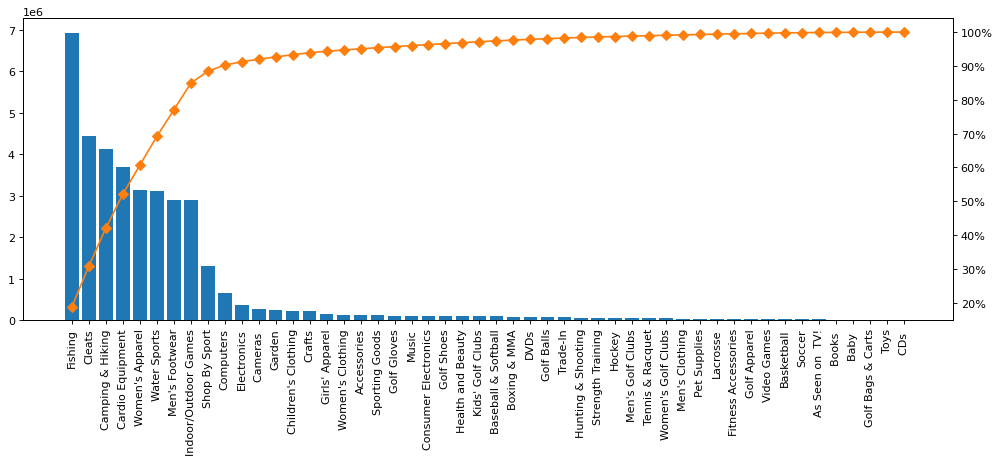

In [34]:
from matplotlib.ticker import PercentFormatter
fig, axes = plt.subplots(figsize=(15, 5),dpi=80)
axes.bar(df_catsalespartot.index,df_catsalespartot['Sales'],color='C0')
plt.xticks(rotation=90)
ax2=axes.twinx()
ax2.plot(df_catsalespartot.index,df_catsalespartot['pareto'],color='C1',marker='D',ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

### c) PRICES

##### Main characteristics of the price (Descriptive statistics):

In [35]:
df_prod.describe()['Product Price']

count    180519.000000
mean        141.232550
std         139.732492
min           9.990000
25%          50.000000
50%          59.990002
75%         199.990005
max        1999.989990
Name: Product Price, dtype: float64

##### Mode:

In [36]:
df['Product Price'].mode()

0    59.990002
dtype: float64

##### Distribution of the prices:

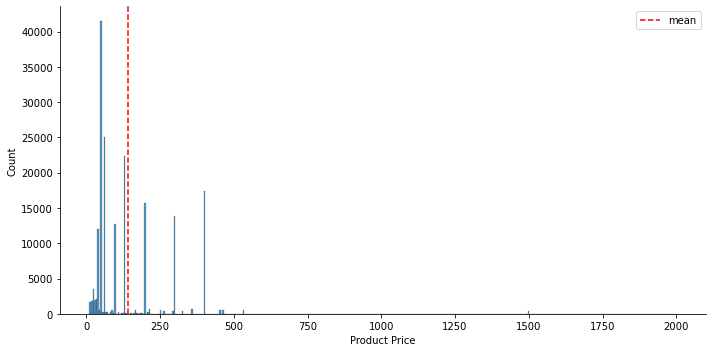

In [37]:
sns.displot(df['Product Price'],aspect=2)
plt.axvline(x=np.mean(df['Product Price']),c='red',ls='--',label='mean')
plt.legend()

(-2.0, 2099.48998951145)

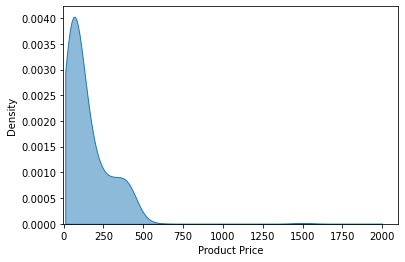

In [38]:
ax = sns.kdeplot(df_prod['Product Price'],bw_adjust=5, cut=0, fill=True, palette="crest", alpha=.5, linewidth=1)
ax.set_xlim(-2, None)

##### Five prices that appears in most orders:

In [39]:
df['Product Price'].value_counts().head(5)

59.990002     24820
129.990005    22372
50.000000     21035
49.980000     19298
399.980011    17325
Name: Product Price, dtype: int64

##### Are the most expensive products the ones that generate the most income?

In [40]:
df_pricemean = df.groupby('Product Name').mean()['Product Price']
df_salessum = df.groupby('Product Name').sum()['Sales']
df_pricesales = pd.concat([df_pricemean,df_salessum], axis=1)
df_pricesales

,Product Price,Sales
Product Name,,
Adult dog supplies,84.400002,41524.800753
Baby sweater,59.080002,12229.560379
Bag Boy Beverage Holder,24.990000,21116.549776
Bag Boy M330 Push Cart,79.989998,16637.919929
Bowflex SelectTech 1090 Dumbbells,599.989990,5999.899902
...,...,...
adidas Kids' F5 Messi FG Soccer Cleat,34.990002,27327.190540
adidas Men's F10 Messi TRX FG Soccer Cleat,59.990002,56330.611645
adidas Men's Germany Black Crest Away Tee,25.000000,21475.000000


Text(0.5, 1.0, 'Mean of Product Prices vs. Sales in Million of USD')

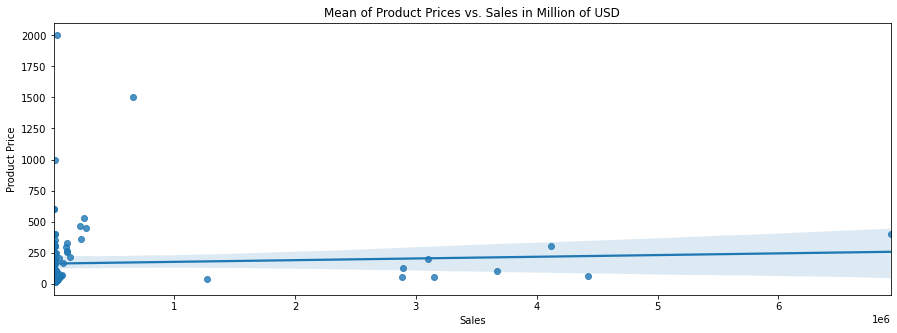

In [41]:
plt.figure(figsize=(15,5))
sns.regplot(x=df_pricesales['Sales'],y=df_pricesales['Product Price'])
plt.title('Mean of Product Prices vs. Sales in Million of USD')

##### Are the most expensive categories (in average) the ones that generate the most income?

In [42]:
df_pricemeanc = df.groupby('Category Name').mean()['Product Price']
df_salessumc = df.groupby('Category Name').sum()['Sales']
df_pricesalesc = pd.concat([df_pricemeanc,df_salessumc], axis=1)
df_pricesalesc

,Product Price,Sales
Category Name,,
Accessories,24.990000,1.336715e+05
As Seen on TV!,99.989998,2.059794e+04
Baby,59.080002,1.222956e+04
Baseball & Softball,59.910888,9.405715e+04
Basketball,404.467602,2.709933e+04
Books,31.080000,1.258740e+04
Boxing & MMA,67.056809,8.520541e+04
CDs,11.290000,3.059590e+03
Cameras,452.040008,2.676077e+05


Text(0.5, 1.0, 'Mean of Product Prices per Category vs. Sales in Million of USD per Category')

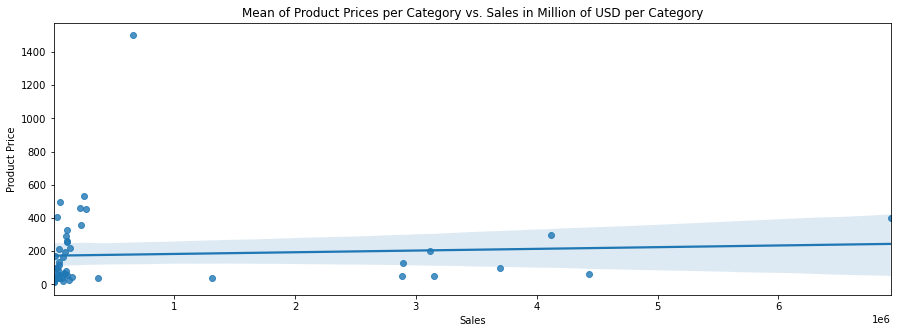

In [43]:
plt.figure(figsize=(15,5)) 
sns.regplot(x=df_pricesalesc["Sales"], y=df_pricesalesc["Product Price"])
plt.title('Mean of Product Prices per Category vs. Sales in Million of USD per Category')

### d) AVAILABILITY

##### How many products are not available at the moment?

In [44]:
df_prod['Product Status'].isin([1]).sum()

0

All the products are available

##### Conclusion:

a) Products

* The company offers 118 products

* The products that appear in more orders are: Perfect Fitness rip deck, Nike CJ Elite Football Cleat and Nike Dri-Fit Victory Golf Polo.

* The products that appear in less orders are Bowflex Dumbells, Sole E25 Elliptical and Pro X7 Slope Rangefinder.

* The products with the highest sells in units are the Perfect Fitness  rip deck, Nike Dri-Fit Victory Golf Polo and O'Brian life vest.

* The products with the highest sells in USD are the Sportsman 16 Gun Fire Safe, the Perfect Fitness rip deck and the Diamondback Women's Serene Classic Comfort

* The highest profit comes from the sales of: Sportsman 16 gun fire safe, the Perfect fitnesss rip deck and the Diamondback women's serene classic comfort. 

* The majority of the products brings a profit lower than 50.000 USD. But, there are 10 products that return a profit higher than these limit. 

* There are three products that return a negative profit (or loss), and it comes from the sales of the SOLE E35 Eliptical, the Pro X7 Jolt Slope Rangefinder and the SOLE E25 Elliptical.


b) Categories

* There are 50 categories in the company

* The ones that appear more in the orders are Cleats, Men's Footwear and Woman's Apparel.

* Most categories has only 1 product, but they could contain from 1 to 11 products.

* The categories that brings more profit are Fishing, Cleats and Camping & Hiking.

* Creating the pareto table, we can see that from the 50 categories in the company, there are 7 that brings 80% of the revenue. These categories are Fishing, Cleats, Camping & Hiking, Cardio Equipment, Woman's Apparel, Water Sports and Men's Footwear.

c) Prices

* The prices goes from 9.99 USD to 1999.99 USD. The mode of the prices 59.99 USD.

* According to the distribution, the majority of the prices of the products are between 0 and 250 USD.

* The three most used prices for the products are 59.99, 129.99 and 50 USD.

* The more expensive products do not generate bigger sales. The same happens with the more expensive categories.


d) Availability

* All the products are available at the moment. 



